# Little's Power Law Data Analysis    
In this notebook I will explore answers to questions that have bothered me in my software delivery role. Why I cannot use vanilla Little's Law to predict / forecast when piece of work will be ready, and what can I do to make it useful. 
 
### Data Background
"Sprint Team" anonymised data was kindly provided by one of my employers. Data represents 1 feature team over 1 year period.

## Initial data analysis 

In [25]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sprints = pd.read_csv("sprintTeam.csv")
sprints["CycleTime"] = sprints["CycleTime"]+1
sprints["LeadTime"] = sprints["LeadTime"]+1
display(sprints.head())

,Sprint,CycleTime,LeadTime
0,A,2,5
1,A,4,11
2,A,7,11
3,A,1,11
4,A,5,11


In [26]:
sprints.describe()

,CycleTime,LeadTime
count,516.000000,516.000000
mean,5.449612,9.447674
std,4.315178,4.520415
min,1.000000,2.000000
25%,2.000000,7.000000
50%,4.000000,9.000000
75%,8.000000,11.000000
max,35.000000,40.000000


array([[<AxesSubplot:title={'center':'CycleTime'}>,
        <AxesSubplot:title={'center':'LeadTime'}>]], dtype=object)

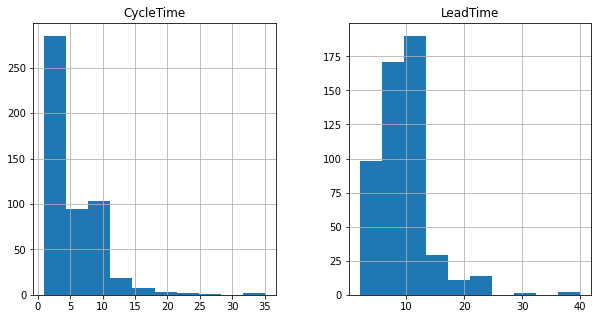

In [27]:
sprints.hist(figsize=(10,5))

Number of work items per Sprint mean: 19, median:19, std: Count    6.149421
dtype: float64


/var/folders/99/ynczk9ks3zdgh2_9d1d_5trw0000gn/T/ipykernel_11483/33208961.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sprints_workitem_count_median = sprints_workitem_count.median().Count.astype(int)
/var/folders/99/ynczk9ks3zdgh2_9d1d_5trw0000gn/T/ipykernel_11483/33208961.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sprints_workitem_count_mean = sprints_workitem_count.mean().Count.astype(int)
/var/folders/99/ynczk9ks3zdgh2_9d1d_5trw0000gn/T/ipykernel_11483/33208961.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select onl

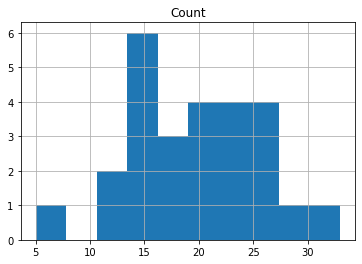

In [28]:
sprints_workitem_count = sprints.groupby('Sprint').agg(Count =('Sprint', 'count'))
sprints_workitem_count = sprints_workitem_count.reset_index()
sprints_workitem_count_median = sprints_workitem_count.median().Count.astype(int)
sprints_workitem_count_mean = sprints_workitem_count.mean().Count.astype(int)
sprints_workitem_count_std = sprints_workitem_count.std()
sprints_workitem_count.hist()

print("Number of work items per Sprint mean: {0}, median:{1}, std: {2}".format(sprints_workitem_count_mean, sprints_workitem_count_median,  sprints_workitem_count_std))

## Looking at the log scale of distribution

In [34]:
sprints_log = sprints.copy(deep=True)
sprints_log["CycleTime"] = np.log10(sprints["CycleTime"])
sprints_log["LeadTime"] = np.log10(sprints["LeadTime"])
sprints_log.describe()

,CycleTime,LeadTime
count,516.000000,516.000000
mean,0.620401,0.929256
std,0.320001,0.205776
min,0.000000,0.301030
25%,0.301030,0.845098
50%,0.602060,0.954243
75%,0.903090,1.041393
max,1.544068,1.602060


In [39]:
display(sprints_log.head())

,Sprint,CycleTime,LeadTime
0,A,0.301030,0.698970
1,A,0.602060,1.041393
2,A,0.845098,1.041393
3,A,0.000000,1.041393
4,A,0.698970,1.041393


<AxesSubplot:ylabel='Frequency'>

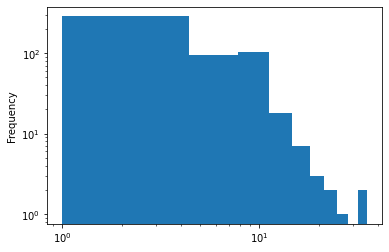

In [48]:
sprints["CycleTime"].plot(kind="hist", logy=True, logx=True)

<AxesSubplot:ylabel='Frequency'>

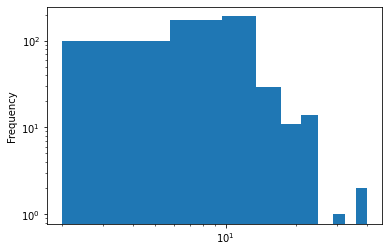

In [50]:
sprints["LeadTime"].plot(kind="hist", logx=True, logy=True)